In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from gwpy.timeseries import TimeSeries
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lib.fromACC2 import MassPoint, GWStrainCalculator

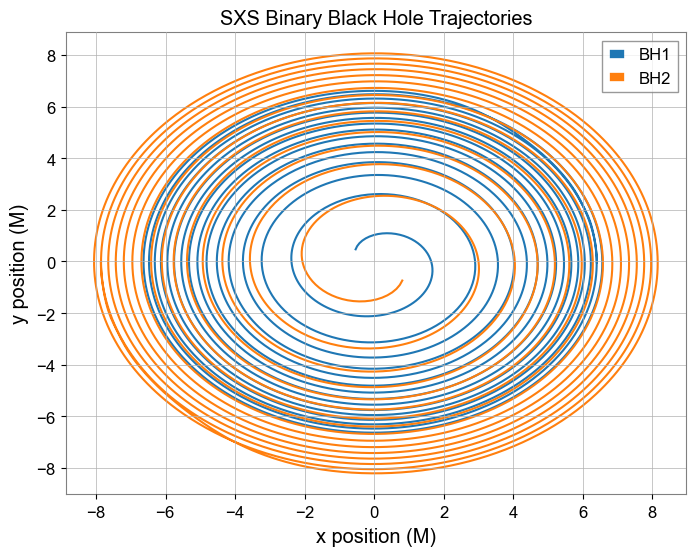

In [2]:
# 1. Load SXS Trajectory Data

file_path = "SXS_data/Trajectories/Horizons.h5"

def load_sxs_trajectory(file_path):
    with h5py.File(file_path, "r") as f:
        # Load time and positions
        time = f["AhA.dir/CoordCenterInertial.dat"][:, 0]  # Time array
        x_A = f["AhA.dir/CoordCenterInertial.dat"][:, 1]  # BH1 x
        y_A = f["AhA.dir/CoordCenterInertial.dat"][:, 2]  # BH1 y
        z_A = f["AhA.dir/CoordCenterInertial.dat"][:, 3]  # BH1 z

        x_B = f["AhB.dir/CoordCenterInertial.dat"][:, 1]  # BH2 x
        y_B = f["AhB.dir/CoordCenterInertial.dat"][:, 2]  # BH2 y
        z_B = f["AhB.dir/CoordCenterInertial.dat"][:, 3]  # BH2 z

    return time, (x_A, y_A, z_A), (x_B, y_B, z_B)

# Load SXS black hole trajectories
sxs_times, (x_A, y_A, z_A), (x_B, y_B, z_B) = load_sxs_trajectory(file_path)

# Plot trajectories
plt.figure(figsize=(8, 6))
plt.plot(x_A, y_A, label="BH1")
plt.plot(x_B, y_B, label="BH2")
plt.xlabel("x position (M)")
plt.ylabel("y position (M)")
plt.legend()
plt.title("SXS Binary Black Hole Trajectories")
plt.show()


In [3]:
'''
SXS uses relativistic units G = c = 1
Timestamps are in mass units: t_SXS = t_real / M, where M = M_1 + M_2 in solar masses (1M = 2x10^30kg)
To convert from SXS times to real times use conversion factor 1M = 5x10^-6s
t_real = t_SXS x M_total x 5x10^-6
Similar case for spatial coordinates, with conversion factor 1.5x10^3:
r_real - r_SXS x M_total x 1.5x10^3
'''

'\nSXS uses relativistic units G = c = 1\nTimestamps are in mass units: t_SXS = t_real / M, where M = M_1 + M_2 in solar masses (1M = 2x10^30kg)\nTo convert from SXS times to real times use conversion factor 1M = 5x10^-6s\nt_real = t_SXS x M_total x 5x10^-6\nSimilar case for spatial coordinates, with conversion factor 1.5x10^3:\nr_real - r_SXS x M_total x 1.5x10^3\n'

In [4]:
header = {
    'Time': sxs_times*(36.2+29.1)*(2*10**30)*(5*10**-6),
    'Mass1_x': x_A*(36.2+29.1)*(2*10**30)*(1.5*10**3),
    'Mass1_y': y_A*(36.2+29.1)*(2*10**30)*(1.5*10**3),
    'Mass2_x': x_B*(36.2+29.1)*(2*10**30)*(1.5*10**3),
    'Mass2_y': y_B*(36.2+29.1)*(2*10**30)*(1.5*10**3),
    'Mass1': 36.2*2e30,
    'Mass2': 29.1*2e30
}

data = pd.DataFrame(header)

data

,Time,Mass1_x,Mass1_y,Mass2_x,Mass2_y,Mass1,Mass2
0,0.0,1253831860584360489720987749510545408.0,-6569206362301919399947898921680896.0,-1539716009277857460687082877383344128.0,-6569206508281770083300094989303808.0,7.240000e+31,5.820000e+31
1,326500000000000060825796608.0,1253812486094914776270168841242279936.0,4056750298923342538933465279102976.0,-1539558687671049888582044015063465984.0,-19614932757783071175528215734124544.0,7.240000e+31,5.820000e+31
2,653000000000000121651593216.0,1253696519851485098032428045077315584.0,14667939826908855497368659493388288.0,-1539292189577564300182062268707504128.0,-32624193852260576571514936543412224.0,7.240000e+31,5.820000e+31
3,979500000000000045038436352.0,1253456565213921891823039993698320384.0,25181031942731578791672550908755968.0,-1538889695002695188870932095305777152.0,-45432497129082500303088837933924352.0,7.240000e+31,5.820000e+31
4,1306000000000000243303186432.0,1253066852527248476117476272032972800.0,35499757760537063562596121411846144.0,-1538355757909925325674255910497681408.0,-58001670744494230430030622680416256.0,7.240000e+31,5.820000e+31
...,...,...,...,...,...,...,...
7389,2412508500000000198065965236224.0,-48017111707678887916570901406023680.0,174879221941073848293153225591226368.0,74442898052460323714575384684003328.0,-256847712907121732383800402395529216.0,7.240000e+31,5.820000e+31
7390,2412835000000000095734770696192.0,-67251976667726715393494820803575808.0,157779121132545597866917125265817600.0,101449426618620344867881442714058752.0,-234718629908847945413542295929618432.0,7.240000e+31,5.820000e+31
7391,2413161500000000274878552866816.0,-83570443624209525258612387161833472.0,137923174655025268804387617162395648.0,125034269921876422463064672571490304.0,-208459170744944521559040694312501248.0,7.240000e+31,5.820000e+31
7392,2413488000000000172547358326784.0,-96290864283157457496882035602489344.0,115762290171370247753886967460265984.0,144223757412093181351064037794775040.0,-178390057370358889267975819471355904.0,7.240000e+31,5.820000e+31


In [5]:
trajectory = []

for _, row in data.iterrows():
    # Create MassPoint objects for each mass
    mass1_point = MassPoint(mass=row['Mass1'], x=row['Mass1_x'], y=row['Mass1_y'])
    mass2_point = MassPoint(mass=row['Mass2'], x=row['Mass2_x'], y=row['Mass2_y'])
    
    # Append MassPoint positions to trajectory []
    trajectory.append([mass1_point, mass2_point])

# Set up strain calculator
calculator = GWStrainCalculator()
r_observer = 41000*1e20  # 410 Mpc
theta = 0          # Overhead observer
phi = 0
dt = data['Time'].iloc[1] - data['Time'].iloc[0]  # Calculate time step from the CSV

# Calculate strain for each timestep pair
H_plus = []
H_cross = []
for i in range(1, len(trajectory) - 1):
    masses_t1 = trajectory[i - 1]  # Previous time step
    masses_t2 = trajectory[i]      # Current time step
    masses_t3 = trajectory[i + 1]  # Next time step
    
    h_plus, h_cross = calculator.calculate_strain_components(
        masses_t1, masses_t2, masses_t3, dt, r_observer, theta, phi
    )
    H_plus.append(h_plus)
    H_cross.append(h_cross)

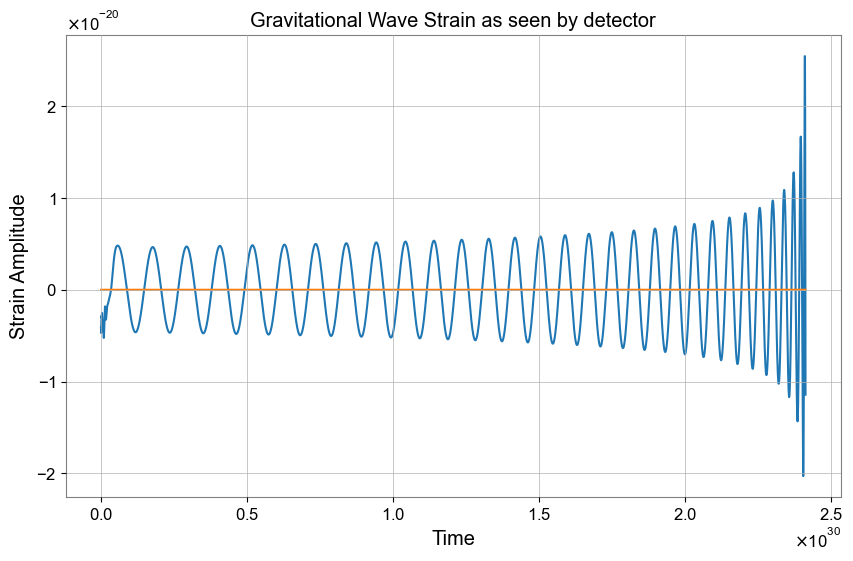

In [6]:
time = data['Time'][:-2]  # Match length to strains array
plt.figure(figsize=(10, 6))
plt.plot(time, H_plus)
plt.plot(time, H_cross)
plt.xlabel('Time')
plt.ylabel('Strain Amplitude')
plt.title('Gravitational Wave Strain as seen by detector')
plt.grid(True)
plt.show()

Sample rate: 16384.0 Hz


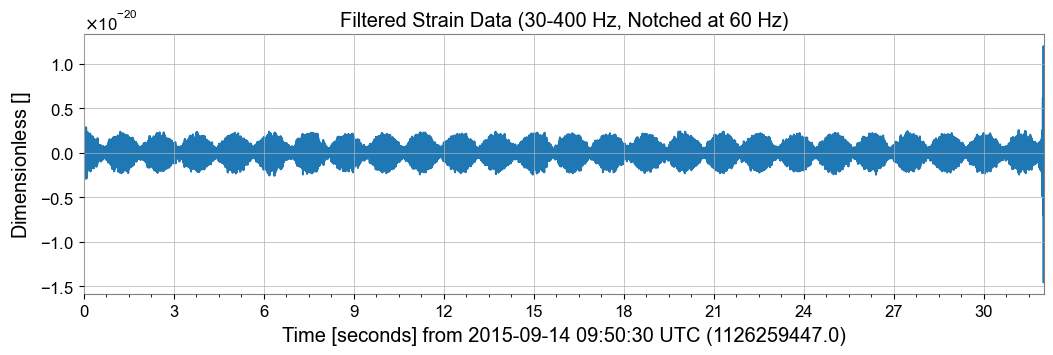

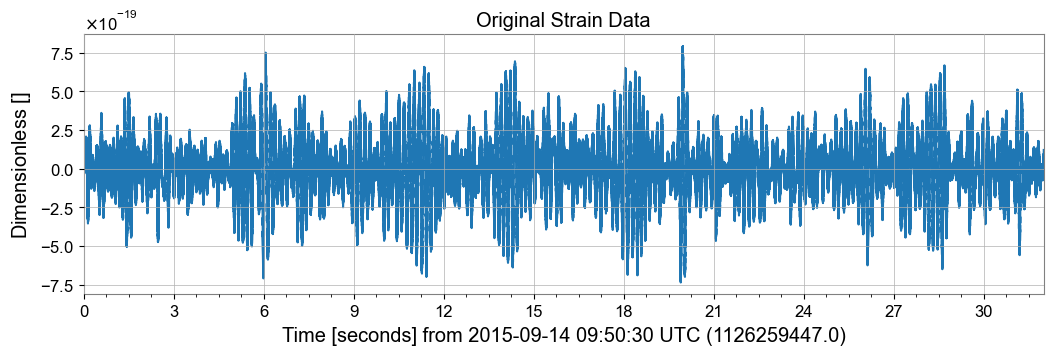

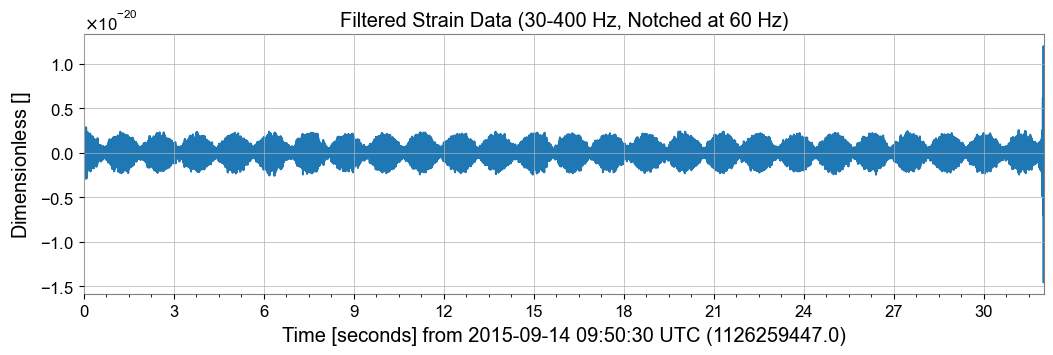

In [7]:
# Plotting GWOSC Strain Data

file_path = "GWOSC_data/GW150914_H1.hdf5"

# Set up attributes from data file
with h5py.File(file_path, "r") as f:
    dataset = f["strain/Strain"]
    data = dataset[()]
    attrs = dict(dataset.attrs)

# Extract metadata from attributes
valid_attrs = {
    'dt': attrs['Xspacing'],  # Time step between samples (0.000061 sec)
    't0': attrs['Xstart'],    # Start time in GPS seconds (1126259447)
    'unit': attrs['Yunits'],  # Strain units (dimensionless)
}

# Create the TimeSeries with corrected parameters
strain = TimeSeries(data, **valid_attrs)
print("Sample rate:", strain.sample_rate)  

# Apply filters to reduce noise
strain_clean = strain.bandpass(30, 400)    # Bandpass filter in 30-400Hz range
strain_clean = strain_clean.notch(60)      # Remove systematic 60Hz noise (from power lines)

strain.plot(title="Original Strain Data")
strain_clean.plot(title="Filtered Strain Data (30-400 Hz, Notched at 60 Hz)")